# Problem 🤔🤔🤔

The problem at hand is to develop a multi-class classification model to predict the rating of products listed on wish.com. Ratings range from 1 to 5, with higher ratings indicating higher customer satisfaction and product likability. By leveraging various features related to the product itself, the merchant, and the wish website, we aim to predict the likelihood of a product receiving a particular rating.

**Business Objective**

The primary objective is to estimate the potential customer satisfaction and likability of new products listed on wish.com before they are actually made available to customers. This prediction capability will enable us to make informed decisions about product listings, optimize the customer experience, and potentially increase sales on the wish.com platform. Additionally, by understanding the factors influencing product ratings, we can gain insights into customer preferences and behaviors, aiding in forecasting purchases and enhancing our understanding of the wish.com customer base.

**Challenges**
The main challenges associated with this problem stem from the quality and variability of the available data. Data from different merchants or sellers may lack standardization and could contain noise or inconsistencies. Additionally, there may be variations in how data is presented, making it difficult to extract meaningful insights and develop robust predictive models.

**Impact**
Successfully addressing this problem will have a significant impact on our ability to forecast purchases and understand the customer base of wish.com. By accurately predicting product ratings, we can improve the overall customer experience by offering high-quality products that align with customer preferences. This, in turn, can lead to increased customer satisfaction, repeat purchases, and improved seller performance. Ultimately, the ideal solution will leverage insights from the predictive model to enhance both the recommendation system for customers and provide real-time performance dashboards for sellers, thereby optimizing the overall marketplace experience on wish.com.

# Data
Data is collected from wish.com and here is in the following picture you can see a sample of the UI experience and how we took some features from it.👇🏻👇🏻👇🏻

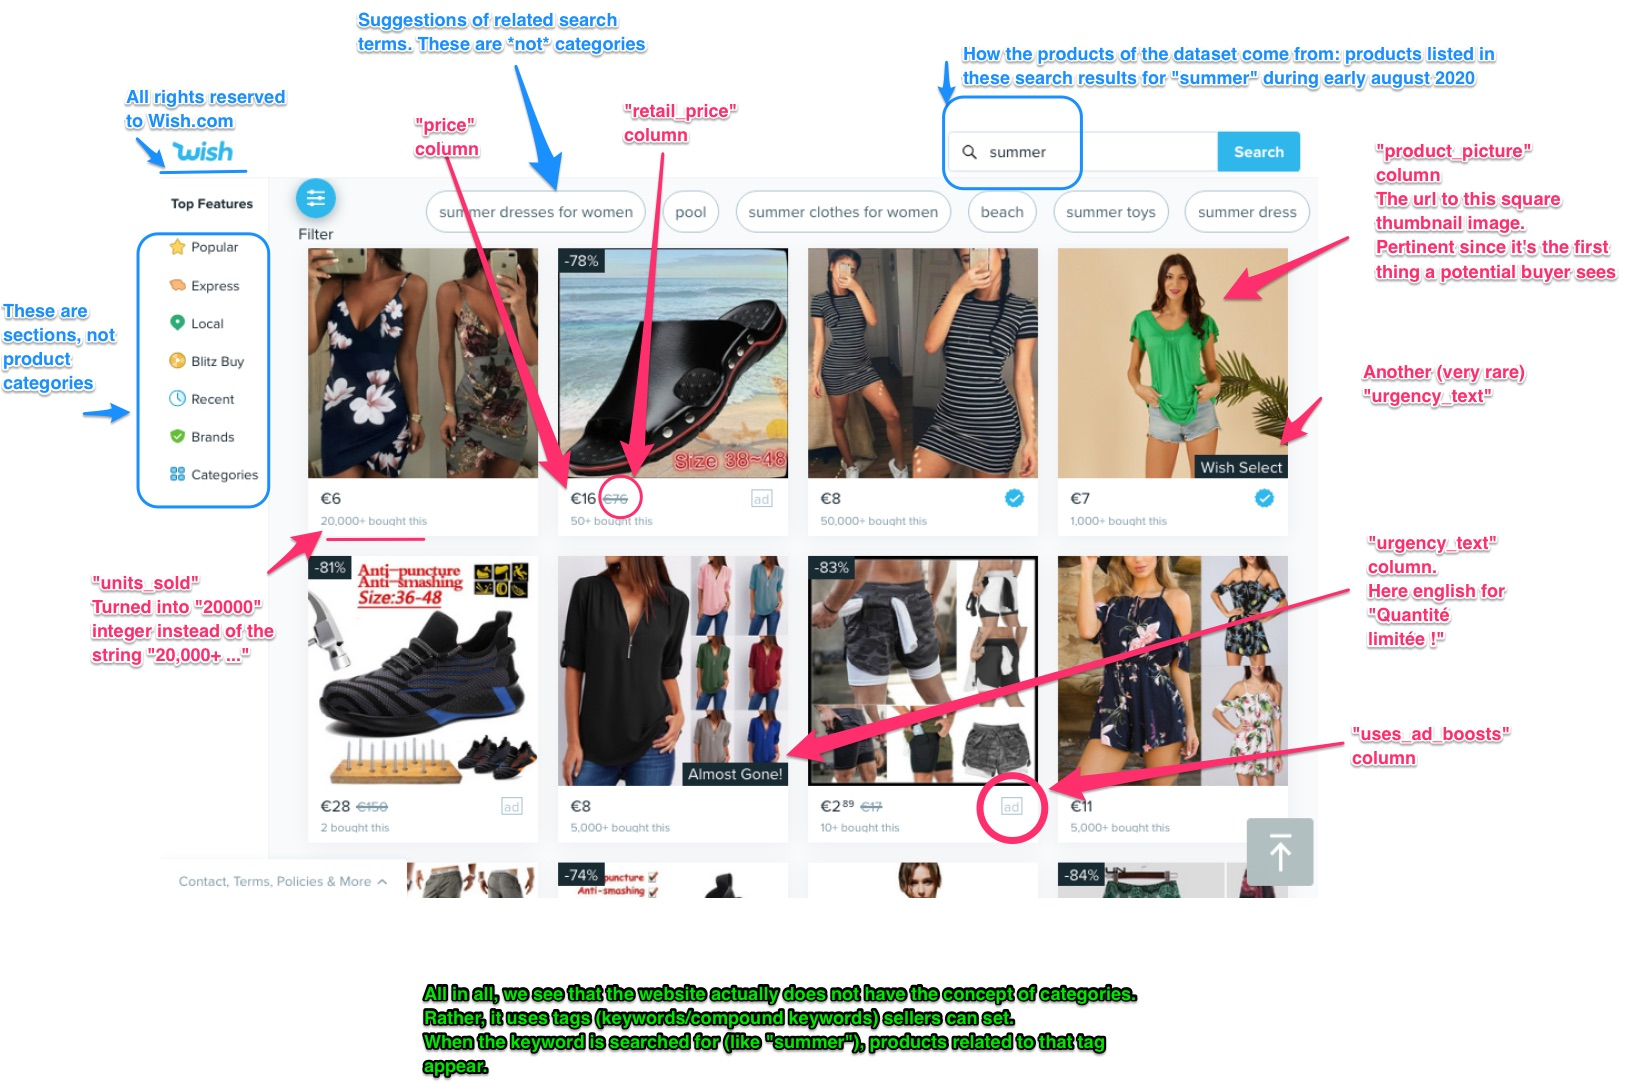

Questions related to data mining course

🌈 Why Data Mining is a misnomer? What is another preferred name?

The term "Data Mining" is considered a misnomer because it implies the extraction of valuable information or knowledge from a vast amount of data, analogous to mining for valuable minerals or resources. However, this term can be misleading as it suggests a passive process of extracting existing knowledge from data, whereas the reality of data analysis often involves a more active and iterative exploration and modeling process.

Another preferred, more describtive name could be data analysis, or knowledge discovery.

🌈 What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?

The general knowledge discovery process, often referred to as Knowledge Discovery in Databases (KDD), consists of several stages:

1. **Data Collection**
2. **Data Preprocessing**
3. **Data Transformation**
4. **Data Mining**
5. **Interpretation and Evaluation**
6. **Knowledge Presentation**

Regarding the difference between a data engineer and a data scientist/AI engineer:

Data engineers focus on building and maintaining data infrastructure, data scientists and AI engineers focus on leveraging data to derive insights, build models, and create value for organizations.

🌈 In data mining, what is the difference between prediction and categorization?

Prediction involves estimating numerical values, while categorization involves assigning instances to predefined categories. Both tasks are essential in data mining and machine learning and are used in various real-world applications, depending on the nature of the problem and the type of data available.

🌈 Why data science/machine learning is a bad idea in the context of information security?

Data science and machine learning can be powerful tools in the context of information security, but there are also potential drawbacks and challenges to consider:

1. Adversarial Attacks
2. Bias and Fairness
3. Overreliance on Automation
4. Data Privacy Concerns
5. Model Interpretability
6. Generalization Challenges
7. Resource Constraints

While data science and machine learning have the potential to enhance information security, it's essential to address these challenges and limitations to ensure the effectiveness and reliability of security solutions.

🌈 What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?

The CIA principle stands for Confidentiality, Integrity, and Availability.

To assess the security and privacy aspects of an AI system or pipeline using the CIA principle, we can consider the following:

1. **Confidentiality**:
   - Evaluate whether sensitive data used by the AI system is adequately protected from unauthorized access or disclosure.
   - Assess the effectiveness of encryption, access controls, and data masking techniques in safeguarding confidential information.
   - Review compliance with regulations and standards related to data privacy, such as GDPR, HIPAA, or PCI DSS.

2. **Integrity**:
   - Check if mechanisms are in place to ensure the accuracy and integrity of data throughout the AI pipeline.
   - Assess the effectiveness of data validation, checksums, and digital signatures in detecting and preventing unauthorized modifications or tampering.
   - Review procedures for monitoring and auditing data integrity, including logging and version control mechanisms.

3. **Availability**:
   - Evaluate the resilience of the AI system to disruptions or failures that could affect availability, such as hardware failures, network outages, or cyberattacks.
   - Assess the effectiveness of redundancy, fault tolerance, and disaster recovery measures in ensuring continuous availability of the system.
   - Review performance monitoring and capacity planning processes to identify and address potential bottlenecks or resource constraints.


# Notebook Structure

Through the notebook we will go through the data science life cycle to achieve results.

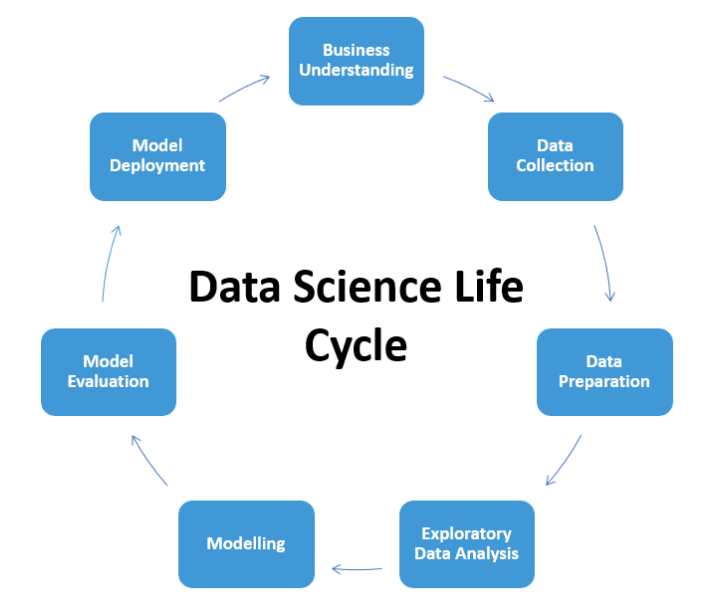

In [ ]:
# import needed libraries

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# to suppress all warnings
warnings.filterwarnings("ignore")
# to display all columnns
pd.set_option('display.max_columns', 500)

# Data Collection

In [ ]:
# read the data

df = pd.read_csv('/content/train_new.csv')

# Data Exploration

Here, I am trying to check several things:
- understand the features and what they represent
- the unique values of categorical values
- the distribution of the features
- determine my target

In [ ]:
# display 5 first rows

df.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,Livraison standard,3,0,30,50,NaN,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,Livraison standard,3,0,37,50,NaN,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,Livraison standard,2,0,41,50,NaN,NaN,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,Livraison standard,1,0,25,50,NaN,NaN,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,Livraison standard,3,0,15,50,1.0,Quantité limitée !,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [ ]:
# display 5 last rows

df.tail()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
1089,4.0,4,EUR,10000,0,4.0,2150,0,0,0,0,"corset top,Fashion,crop top,camisole,knittop,T...",red,S,50,Livraison standard,1,0,41,50,NaN,NaN,CN,fantastic_tune,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,53f2db3c104dae6bcae0c271,0,NaN,summer,2020-08,1381
1090,5.0,5,EUR,1000,0,5.0,377,1,0,1,0,"Blues,Summer,luggagesticker,Bicycle,cute,fresh...",NaN,H01,31,Livraison standard,2,0,35,50,NaN,NaN,CN,zzbllss,zzbllss,"(2,904 notes)",2904,4.422521,592968ba63950d682ca4b195,0,NaN,summer,2020-08,212
1091,9.0,48,EUR,1000,1,4.0,135,0,0,0,0,"Summer,Vest,Fashion,Tank,camisole,Halter,Beaut...",purple,M,50,Livraison standard,3,0,25,50,NaN,NaN,CN,OIUG 56465,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,5b6ec2f2838d931d2fbf7a28,0,NaN,summer,2020-08,163
1092,11.0,10,EUR,10000,1,4.0,1479,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,letter pri...",black,M,50,Livraison standard,2,0,45,50,1.0,Quantité limitée !,CN,yubenqiang,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,58330d7def56284f7634e5e5,0,NaN,summer,2020-08,674
1093,7.0,6,EUR,1000,1,3.0,141,0,0,0,0,"sleeve v-neck,Summer,Plus Size,Sleeve,Dresses,...",yellow,XS,7,Livraison standard,2,0,23,50,1.0,Quantité limitée !,CN,Suyi Technology,greatexpectationstechnology,"86 % avis positifs (12,309 notes)",12309,4.045170,5acaf29d5ebcfd72403106a8,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,1536


In [ ]:
# display the info of the training data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

In [ ]:
# display the statstical description of the training data

df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,349.0,1.094000e+03,1094.000000,1094.000000,1094.000000
mean,8.320786,23.712066,4518.661792,0.432358,4.006399,915.523766,0.114260,0.019196,0.083181,0.011883,32.807130,2.344607,0.002742,40.484461,49.849177,1.0,2.678399e+04,4.036191,0.155393,772.207495
std,4.027448,31.802661,9825.608568,0.495630,0.585706,2037.561158,0.348461,0.137275,0.276282,0.108409,21.454655,1.044781,0.052318,20.196229,2.480687,0.0,8.616171e+04,0.200397,0.362445,453.784430
min,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,1.000000,1.0,4.000000e+00,2.941176,0.000000,2.000000
25%,5.830000,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.926000e+03,3.918464,0.000000,382.250000
50%,8.000000,10.000000,1000.000000,0.000000,4.000000,143.500000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,8.225000e+03,4.045170,0.000000,752.500000
75%,11.000000,26.000000,5000.000000,1.000000,4.000000,845.500000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.306200e+04,4.166826,0.000000,1166.500000
max,49.000000,252.000000,100000.000000,1.000000,6.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,4.577519,1.000000,1572.000000


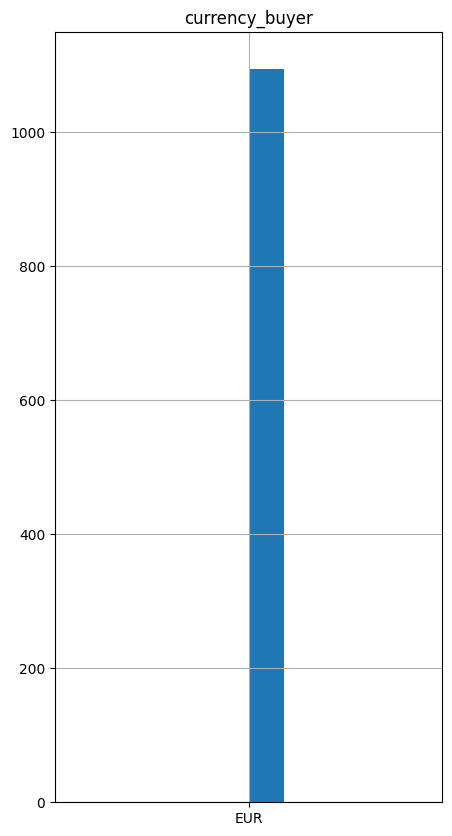

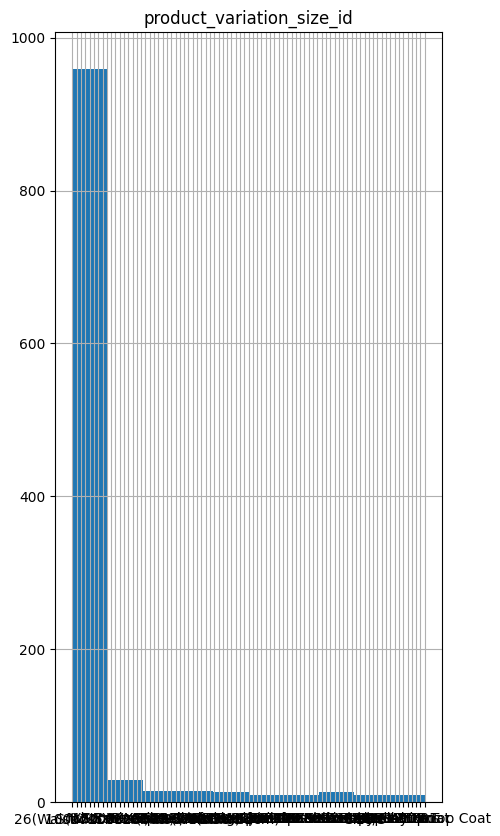

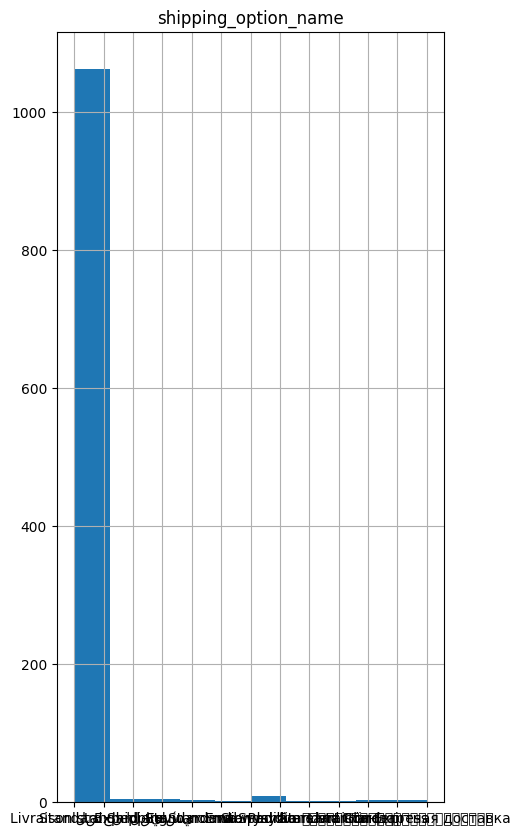

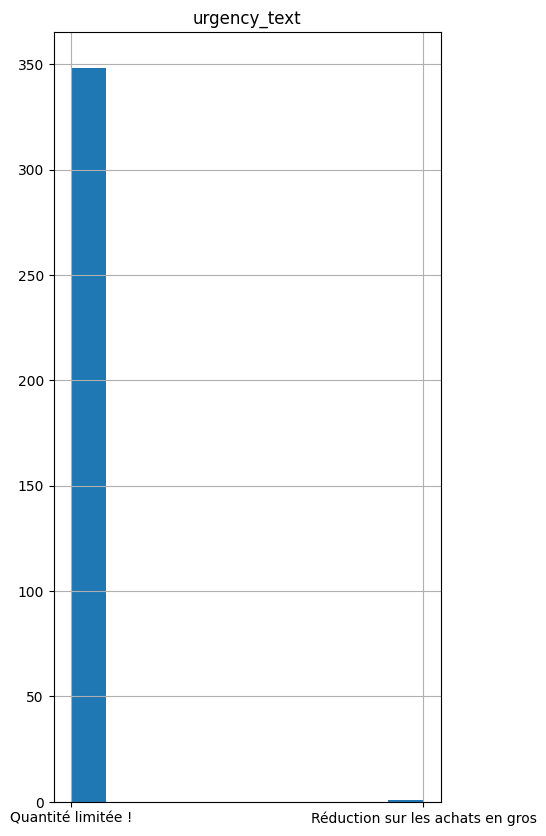

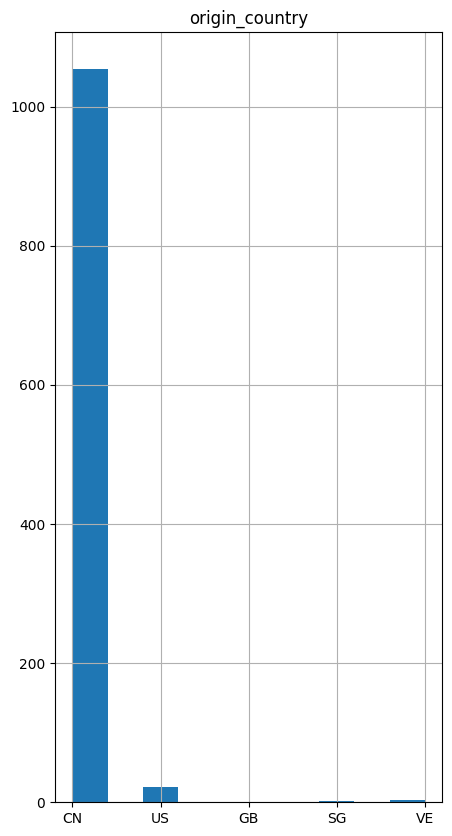

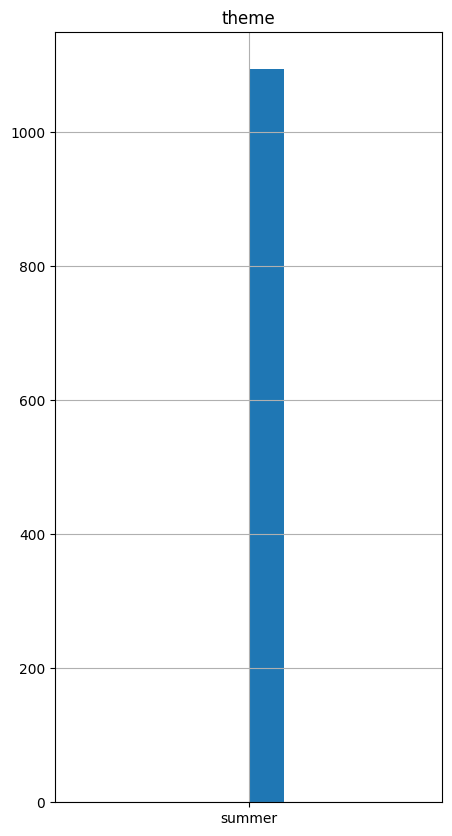

In [ ]:
# visualize categorical columns

categorical_columns = ['currency_buyer', 'product_variation_size_id', 'shipping_option_name','urgency_text', 'origin_country', 'theme']
# Plot the histogram thanks to the displot function
for col in categorical_columns:
  plt.figure(figsize=(5,10))
  df[col].hist()
  plt.title(col)
  plt.show()


After seeing the graph, I will check values of some features


In [ ]:
# see the tags
df['tags']

0       Summer,soildcolor,Plus Size,Tank,camisole,Tops...
1       bathing suit,Plus Size,bikini set,sexy swimsui...
2       Summer,Vest,momshirt,Get,summer t-shirts,funny...
3       Summer,Shorts,pants,Beach,Plus Size,beachpant,...
4       Summer,Floral print,women dresses,fashion dres...
                              ...                        
1089    corset top,Fashion,crop top,camisole,knittop,T...
1090    Blues,Summer,luggagesticker,Bicycle,cute,fresh...
1091    Summer,Vest,Fashion,Tank,camisole,Halter,Beaut...
1092    Summer,Shorts,Cotton,Cotton T Shirt,letter pri...
1093    sleeve v-neck,Summer,Plus Size,Sleeve,Dresses,...
Name: tags, Length: 1094, dtype: object

In [ ]:
# see the unique values of the product_color
df['product_color'].unique()

array(['yellow', 'black', 'white', 'lakeblue', 'apricot', 'brown',
       'winered', 'blue', 'red', 'navyblue', 'green', 'khaki', 'White',
       'white & green', 'multicolor', 'lightpink', 'pink', 'RED',
       'armygreen', 'lightblue', nan, 'coffee', 'grey', 'skyblue',
       'watermelonred', 'pink & black', 'whitefloral', 'purple', 'navy',
       'pink & white', 'rosered', 'orange', 'Black', 'mintgreen',
       'leopardprint', 'gray', 'navy blue', 'star', 'rose', 'lightyellow',
       'camouflage', 'black & yellow', 'whitestripe', 'navyblue & white',
       'black & blue', 'lightred', 'violet', 'gold', 'black & green',
       'white & black', 'burgundy', 'black & white', 'lightgrey',
       'coolblack', 'lightgreen', 'beige', 'darkblue', 'darkgreen',
       'silver', 'wine red', 'Army green', 'pink & blue', 'rainbow',
       'claret', 'floral', 'brown & yellow', 'light green', 'Pink',
       'blue & pink', 'dustypink', 'camel', 'orange-red', 'rosegold',
       'ivory', 'fluorescentg

In [ ]:
# see the unique values of the urgency_text

df['urgency_text'].unique()

array([nan, 'Quantité limitée !', 'Réduction sur les achats en gros'],
      dtype=object)

In [ ]:
df['shipping_option_name'].unique()

array(['Livraison standard', 'Standard Shipping', 'الشحن القياسي',
       'Expediere Standard', 'Envío normal', 'Standardowa wysyłka',
       'Envio Padrão', 'Standardversand', 'Spedizione standard',
       'Standart Gönderi', 'Livraison Express', 'ការដឹកជញ្ជូនតាមស្តង់ដារ',
       'Стандартная доставка'], dtype=object)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'retail_price'}>,
        <Axes: title={'center': 'units_sold'}>,
        <Axes: title={'center': 'uses_ad_boosts'}>],
       [<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'rating_count'}>,
        <Axes: title={'center': 'badges_count'}>,
        <Axes: title={'center': 'badge_local_product'}>],
       [<Axes: title={'center': 'badge_product_quality'}>,
        <Axes: title={'center': 'badge_fast_shipping'}>,
        <Axes: title={'center': 'product_variation_inventory'}>,
        <Axes: title={'center': 'shipping_option_price'}>],
       [<Axes: title={'center': 'shipping_is_express'}>,
        <Axes: title={'center': 'countries_shipped_to'}>,
        <Axes: title={'center': 'inventory_total'}>,
        <Axes: title={'center': 'has_urgency_banner'}>],
       [<Axes: title={'center': 'merchant_rating_count'}>,
        <Axes: title={'center': 'merchant_rating'}>,
        <Axes: title={'cen

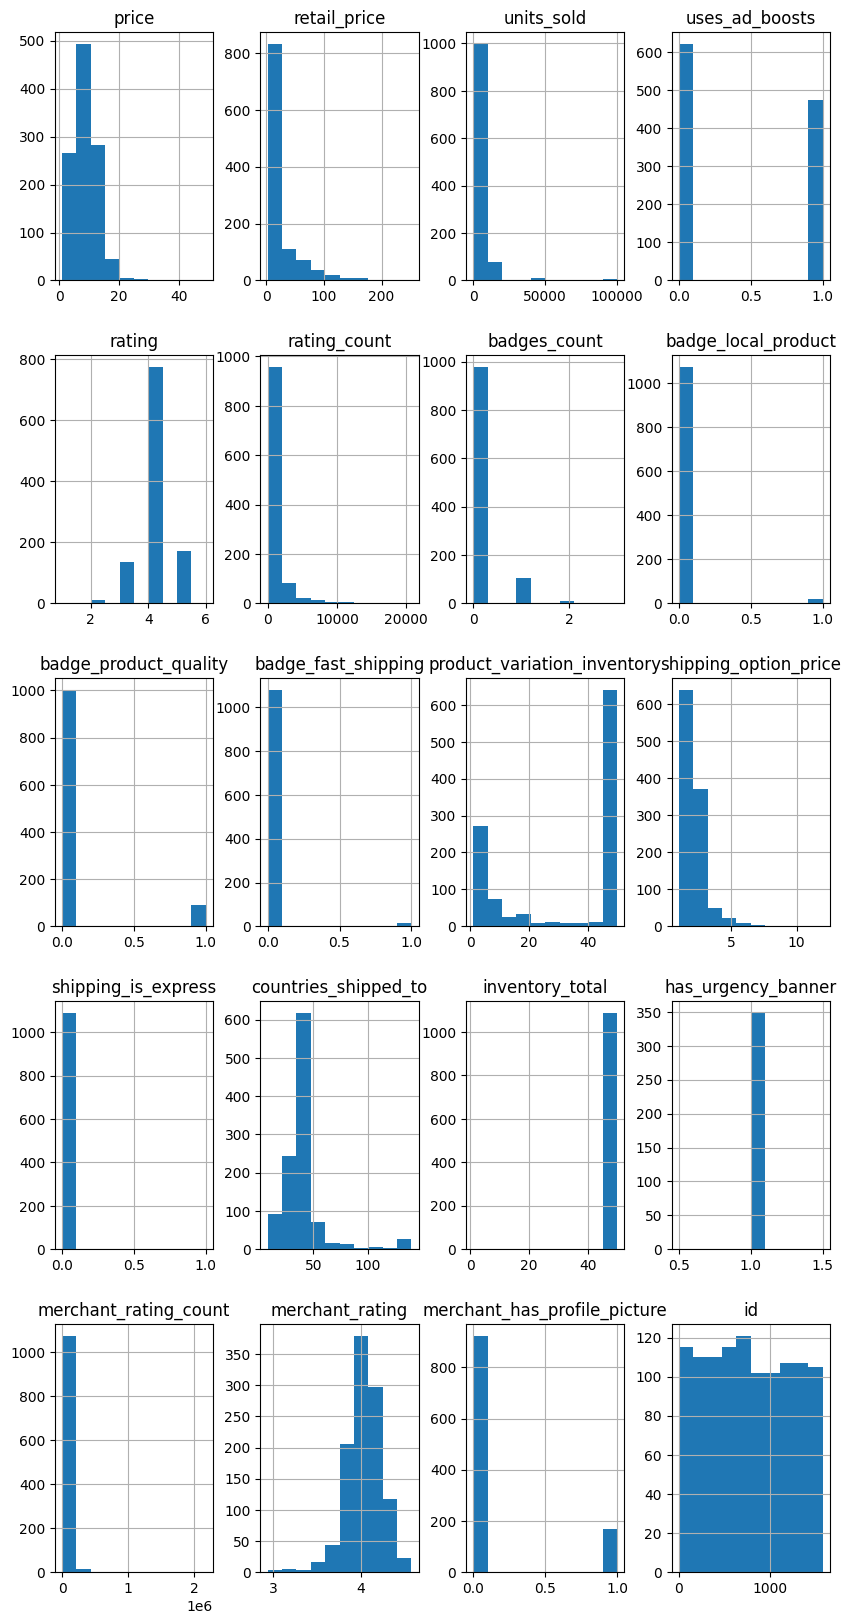

In [ ]:
# for the numerical
df.hist(figsize=(10,20))

# Data Cleaning
Will work with two approcahes to clean
- Deal with missing values by:
  - imputation
  - drop
- Standardize some values

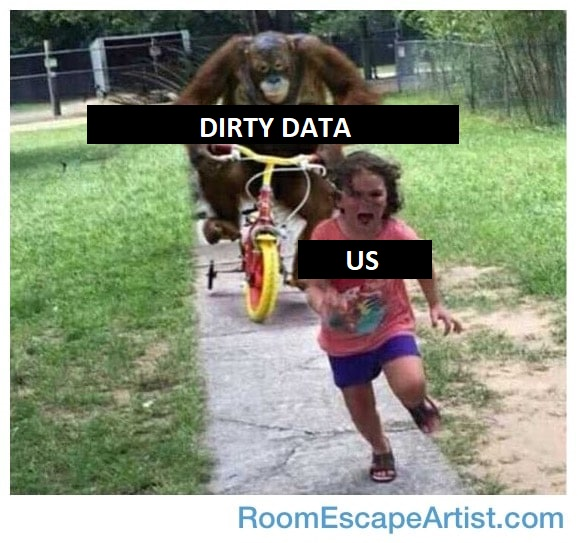


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

## Feature origin_country


In [ ]:
# getting the unique values of origin_country

df['origin_country'].unique()

array(['CN', 'US', 'GB', nan, 'SG', 'VE'], dtype=object)

In [ ]:
# count na values in origin_country

df['origin_country'].isna().sum()

12

In [ ]:
# what is the count of each value in origin_country

df['origin_country'].value_counts()

CN    1054
US      22
VE       3
SG       2
GB       1
Name: origin_country, dtype: int64

In [ ]:
# replace nan values with the most common value CN

df['origin_country'].fillna(df['origin_country'].mode()[0], inplace=True)


## Feature has_urgency_banner

In [ ]:
df[['has_urgency_banner','urgency_text']]

,has_urgency_banner,urgency_text
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,1.0,Quantité limitée !
...,...,...
1089,NaN,NaN
1090,NaN,NaN
1091,NaN,NaN
1092,1.0,Quantité limitée !


because those 2 features reprresent the same thing, I will use one feature of them and impute Nan in has_urgency_banner with zero becuase in urgency_text corresponding to NAN is empty (which means zero)

In [ ]:
# replace all NaN with 0 in df['has_urgency_banner']

df['has_urgency_banner'].fillna(0, inplace=True)


## Feature product_variation_size_id


In [ ]:
# getting the unique values of product_variation_size_id

df['product_variation_size_id'].unique()

array(['M', 'L', 'XS', 'S', 'XL', '26(Waist 72cm 28inch)', 'S.',
       'S(bust 88cm)', 'XXS', 's', '29', nan, 'choose a size', 'XXXS',
       'Base Coat', 'Size M', 'XXL', 'M.', 'XS.',
       '100 x 100cm(39.3 x 39.3inch)', '2pcs', '4XL', '1', '25-S',
       'Size-XXS', '5PAIRS', '35', 'Pack of 1', 'Size S', 'Size-S', '6XL',
       '25', 'S/M(child)', '60', 'Size-XS', 'S (waist58-62cm)',
       'SIZE XXS', '10 ml', 'X   L', 'Women Size 36', '04-3XL',
       'Size -XXS', '1 pc.', 'Floating Chair for Kid', 'S Pink', '34',
       'US-S', 'Size XXS', 'pants-S', 'XXXXL', 'SIZE-XXS', 'SIZE XS',
       '1pc', 'Size S.', '100 cm', 'S..', 'Round', '4-5 Years', '5', '33',
       '30 cm', '2', 'XXXXXL', '20PCS-10PAIRS', '2XL', 'Size-5XL',
       'Size4XL', 'One Size', 'size S', 'Size/S', 'B', 'SizeL', '20pcs',
       '1 PC - XL', 'Suit-S', 'Base & Top & Matte Top Coat',
       'Baby Float Boat', '1m by 3m', 'SIZE S', 'White', '40 cm', '5XL',
       '10pcs', 'H01'], dtype=object)

In [ ]:
# lower all letters
df['product_variation_size_id_cleaned'] = df['product_variation_size_id'].str.lower()
# remove non-alphanumeric characters
df['product_variation_size_id_cleaned'] = df['product_variation_size_id_cleaned'].str.replace(r'\W', '')
# remove irrelevant entries
irrelevant_entries = ['chooseasize', 'basecoat', 'packof1', 'floatingchairforkid', 'suit', 'babyfloatboat','basetopmattetopcoat']
df = df[~df['product_variation_size_id_cleaned'].isin(irrelevant_entries)]

In [ ]:
def standardize_sizes(size):
  """
  Converts sizes to a consistent format.

  Args:
    size: The size string to be standardized.

  Returns:
    The standardized size string.
  """

  if isinstance(size, str):
    size = size.lower()
    size = size.replace('sizem', 'm')
    size = size.replace('s(bust88cm)', 's')
    size = size.replace('xxxs', '3xs')
    size = size.replace('xxs', '2xs')
    size = size.replace('xxxxl', '4xl')
    size = size.replace('xxxxxl', '5xl')
    size = size.replace('xxl', '2xl')
    size = size.replace('sizexxs', '2xs')
    size = size.replace('sizexs', 'xs')
    size = size.replace('size5xl', '5xl')
    size = size.replace('size4xl', '4xl')
    size = size.replace('sizel', 'l')
    size = size.replace('suits', 's')
    size = size.replace('size2xs', '2xs')
    size = size.replace('sizes', 's')
    size = size.replace('onesize', 'm')
    size = size.replace('womensize36', 's')
    size = size.replace('pantss', 's')
    size = size.replace('uss', 's')
    size = size.replace('spink', 's')
    size = size.replace('smchild', 's')
    size = size.replace('sbust88cm', 's')
    size = size.replace('26waist72cm28inch', 's')
    size = size.replace('45years', '3xs')
    size = size.replace('33', '2xs')
    size = size.replace('34', 'xs')
    size = size.replace('35', 'xs')
    size = size.replace('swaist5862cm', 's')
    size = size.replace('25s', 's')
    size = size.replace('043xl', '3xl')

  return size



In [ ]:
# apply the function standardize_sizes

df['product_variation_size_id_cleaned'] = df['product_variation_size_id_cleaned'].apply(standardize_sizes)

In [ ]:
# checking the unique values again to see the difference

df['product_variation_size_id_cleaned'].unique()

array(['m', 'l', 'xs', 's', 'xl', '2xs', '29', nan, '3xs', '2xl',
       '100x100cm393x393inch', '2pcs', '4xl', '1', '5pairs', '6xl', '25',
       '60', '10ml', '3xl', '1pc', '100cm', 'round', '5', '30cm', '2',
       'x4xl', '20pcs10pairs', '5xl', 'b', '20pcs', '1pcxl', '1mby3m',
       'white', '40cm', '10pcs', 'h01'], dtype=object)

In [ ]:
df[['product_variation_size_id','product_variation_size_id_cleaned']]

,product_variation_size_id,product_variation_size_id_cleaned
0,M,m
1,L,l
2,L,l
3,XS,xs
4,S,s
...,...,...
1089,S,s
1090,H01,h01
1091,M,m
1092,M,m


In [ ]:
# impute: fillna with the most common value

df['product_variation_size_id_cleaned'].fillna(df['product_variation_size_id_cleaned'].mode()[0], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 0 to 1093
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              1088 non-null   float64
 1   retail_price                       1088 non-null   int64  
 2   currency_buyer                     1088 non-null   object 
 3   units_sold                         1088 non-null   int64  
 4   uses_ad_boosts                     1088 non-null   int64  
 5   rating                             1088 non-null   float64
 6   rating_count                       1088 non-null   int64  
 7   badges_count                       1088 non-null   int64  
 8   badge_local_product                1088 non-null   int64  
 9   badge_product_quality              1088 non-null   int64  
 10  badge_fast_shipping                1088 non-null   int64  
 11  tags                               1088 non-null   objec

## Feature shipping_option_name

In [ ]:
# getting the unique value of shipping_option_name

df['shipping_option_name'].unique()

array(['Livraison standard', 'Standard Shipping', 'الشحن القياسي',
       'Expediere Standard', 'Envío normal', 'Standardowa wysyłka',
       'Envio Padrão', 'Standardversand', 'Spedizione standard',
       'Standart Gönderi', 'Livraison Express', 'ការដឹកជញ្ជូនតាមស្តង់ដារ',
       'Стандартная доставка'], dtype=object)

I used google translate to translate those values and it turns out they all have the same meaning standard shipping, except one value which is express

In [ ]:
translated = {}

for list_item in df['shipping_option_name'].unique():
  if list_item != 'Livraison Express':
    translated[list_item] = 'standard shipping'
  else:
    translated[list_item] = 'express shipping'

df['shipping_option_name_cleaned'] = df['shipping_option_name'].replace(translated)

In [ ]:
# another way to standardize values is to extract from shipping_is_express column which has the same meaning of shipping_option_name feature

df['shipping_option_name_cleaned'] = df['shipping_is_express'].apply(lambda x: 'express shipping' if x == 1 else 'standard shipping')

In [ ]:
df[['shipping_option_name', 'shipping_option_name_cleaned']]

,shipping_option_name,shipping_option_name_cleaned
0,Livraison standard,standard shipping
1,Livraison standard,standard shipping
2,Livraison standard,standard shipping
3,Livraison standard,standard shipping
4,Livraison standard,standard shipping
...,...,...
1089,Livraison standard,standard shipping
1090,Livraison standard,standard shipping
1091,Livraison standard,standard shipping
1092,Livraison standard,standard shipping


<Axes: >

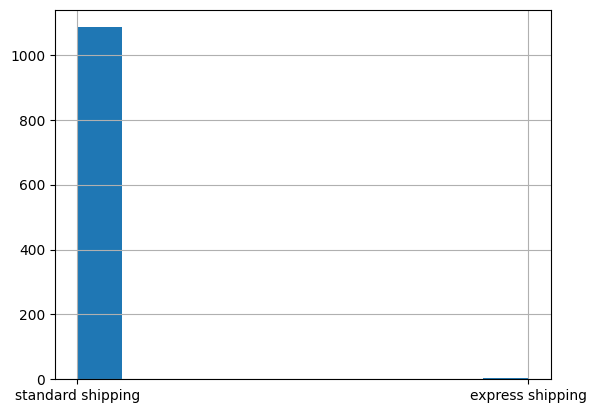

In [ ]:
df['shipping_option_name_cleaned'].hist()

In [ ]:
df['shipping_is_express'].value_counts()

0    1085
1       3
Name: shipping_is_express, dtype: int64

In [ ]:
df['shipping_option_name_cleaned'].value_counts()

standard shipping    1085
express shipping        3
Name: shipping_option_name_cleaned, dtype: int64

rechecking the correctness by seeing `shipping_is_express` and `shipping_option_name_cleaned`





## Feature product_color

In [ ]:
df['product_color'].unique()

array(['yellow', 'black', 'white', 'lakeblue', 'apricot', 'brown',
       'winered', 'blue', 'red', 'navyblue', 'green', 'khaki', 'White',
       'white & green', 'multicolor', 'lightpink', 'pink', 'armygreen',
       'lightblue', 'coffee', 'grey', 'skyblue', 'watermelonred',
       'pink & black', 'whitefloral', 'purple', 'navy', 'pink & white',
       nan, 'rosered', 'orange', 'Black', 'mintgreen', 'leopardprint',
       'gray', 'navy blue', 'star', 'rose', 'lightyellow', 'camouflage',
       'black & yellow', 'whitestripe', 'navyblue & white',
       'black & blue', 'lightred', 'violet', 'gold', 'black & green',
       'white & black', 'burgundy', 'black & white', 'lightgrey',
       'coolblack', 'lightgreen', 'beige', 'darkgreen', 'silver',
       'wine red', 'Army green', 'pink & blue', 'rainbow', 'claret',
       'floral', 'brown & yellow', 'light green', 'Pink', 'darkblue',
       'blue & pink', 'dustypink', 'camel', 'orange-red', 'rosegold',
       'ivory', 'fluorescentgreen', 

In [ ]:
# lower all letters
df['product_color_cleaned'] = df['product_color'].str.lower()
# remove non-alphanumeric characters
df['product_color_cleaned'] = df['product_color_cleaned'].str.replace(r'\W', '')
# fillna with the most common color instead of deleting them
df['product_color_cleaned'].fillna(df['product_color_cleaned'].mode()[0], inplace=True)

In [ ]:
print(len(df['product_color'].unique()))
print(len(df['product_color_cleaned'].unique()))

87
76


In [ ]:
df['product_color_cleaned'].unique()

array(['yellow', 'black', 'white', 'lakeblue', 'apricot', 'brown',
       'winered', 'blue', 'red', 'navyblue', 'green', 'khaki',
       'whitegreen', 'multicolor', 'lightpink', 'pink', 'armygreen',
       'lightblue', 'coffee', 'grey', 'skyblue', 'watermelonred',
       'pinkblack', 'whitefloral', 'purple', 'navy', 'pinkwhite',
       'rosered', 'orange', 'mintgreen', 'leopardprint', 'gray', 'star',
       'rose', 'lightyellow', 'camouflage', 'blackyellow', 'whitestripe',
       'navybluewhite', 'blackblue', 'lightred', 'violet', 'gold',
       'blackgreen', 'whiteblack', 'burgundy', 'blackwhite', 'lightgrey',
       'coolblack', 'lightgreen', 'beige', 'darkgreen', 'silver',
       'pinkblue', 'rainbow', 'claret', 'floral', 'brownyellow',
       'darkblue', 'bluepink', 'dustypink', 'camel', 'orangered',
       'rosegold', 'ivory', 'fluorescentgreen', 'wineredyellow',
       'offwhite', 'lightgray', 'wine', 'army', 'applegreen', 'nude',
       'pinkgrey', 'denimblue', 'leopard'], dtype

In [ ]:
df['product_color_cleaned'].isna().sum()

0

## Feature merchant_id and id

In [ ]:
# will not affect modelling and decision so drop them

df.drop(columns=['merchant_id', 'id'], inplace=True)

## Feature merchant_profile_picture
extract new feature from it

In [ ]:
df['merchant_profile_picture'].isna().sum()

920

In [ ]:
df['merchant_has_profile_pic'] = df['merchant_profile_picture'].fillna(0)
df['merchant_has_profile_pic'] = df['merchant_has_profile_pic'].apply(lambda x: 1 if x != 0 else 0)

In [ ]:
df[['merchant_profile_picture', 'merchant_has_profile_pic']]

,merchant_profile_picture,merchant_has_profile_pic
0,https://s3-us-west-1.amazonaws.com/sweeper-pro...,1
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
...,...,...
1089,NaN,0
1090,NaN,0
1091,NaN,0
1092,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 0 to 1093
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              1088 non-null   float64
 1   retail_price                       1088 non-null   int64  
 2   currency_buyer                     1088 non-null   object 
 3   units_sold                         1088 non-null   int64  
 4   uses_ad_boosts                     1088 non-null   int64  
 5   rating                             1088 non-null   float64
 6   rating_count                       1088 non-null   int64  
 7   badges_count                       1088 non-null   int64  
 8   badge_local_product                1088 non-null   int64  
 9   badge_product_quality              1088 non-null   int64  
 10  badge_fast_shipping                1088 non-null   int64  
 11  tags                               1088 non-null   objec

## Feature merchant_info_subtitle
extract from it the percentages of positive opinions

In [ ]:
df[['merchant_info_subtitle']]

,merchant_info_subtitle
0,"88 % avis positifs (66,644 notes)"
1,"91 % avis positifs (25,752 notes)"
2,"83 % avis positifs (3,897 notes)"
3,"87 % avis positifs (7,497 notes)"
4,91 % avis positifs (173 notes)
...,...
1089,"92 % avis positifs (230,951 notes)"
1090,"(2,904 notes)"
1091,"78 % avis positifs (6,632 notes)"
1092,"83 % avis positifs (5,816 notes)"


In [ ]:
df['merchant_info_subtitle'].unique()

array(['88 % avis positifs (66,644 notes)',
       '91 % avis positifs (25,752 notes)',
       '83 % avis positifs (3,897 notes)',
       '87 % avis positifs (7,497 notes)',
       '91 % avis positifs (173 notes)', '(16,885 notes)',
       '(253,249 notes)', '82 % avis positifs (519 notes)',
       '88 % avis positifs (5,819 notes)',
       '87 % avis positifs (9,116 notes)',
       '80 % avis positifs (3,762 notes)',
       '88 % avis positifs (59,903 notes)',
       '91 % avis positifs (44,067 notes)',
       '91 % avis positifs (4,448 notes)',
       '88 % avis positifs (2,116 notes)',
       '93 % avis positifs (3,276 notes)', '(2,127 notes)',
       '88 % avis positifs (9 notes)',
       '89 % avis positifs (126,370 notes)',
       '85 % avis positifs (331 notes)',
       '91 % avis positifs (38,100 notes)',
       '90 % avis positifs (90,105 notes)',
       '94 % avis positifs (1,963 notes)',
       '81 % avis positifs (12,134 notes)',
       '85 % avis positifs (1,373 notes)',
 

In [ ]:
pattern = r'(\d+)\s*%'

# Extract the percentage from each merchant_info_subtitle into a new column
df['merchant_positive_percentage'] = df['merchant_info_subtitle'].str.extract(pattern, expand=False).astype(float)


In [ ]:
df[['merchant_positive_percentage','merchant_info_subtitle']]

,merchant_positive_percentage,merchant_info_subtitle
0,88.0,"88 % avis positifs (66,644 notes)"
1,91.0,"91 % avis positifs (25,752 notes)"
2,83.0,"83 % avis positifs (3,897 notes)"
3,87.0,"87 % avis positifs (7,497 notes)"
4,91.0,91 % avis positifs (173 notes)
...,...,...
1089,92.0,"92 % avis positifs (230,951 notes)"
1090,NaN,"(2,904 notes)"
1091,78.0,"78 % avis positifs (6,632 notes)"
1092,83.0,"83 % avis positifs (5,816 notes)"


In [ ]:
df['merchant_positive_percentage'].isna().sum()

207

In [ ]:
df[df['merchant_positive_percentage'].isna()][['merchant_positive_percentage','merchant_info_subtitle']]

,merchant_positive_percentage,merchant_info_subtitle
5,NaN,"(16,885 notes)"
6,NaN,"(253,249 notes)"
16,NaN,"(2,127 notes)"
30,NaN,"(3,743 notes)"
32,NaN,"(70,773 notes)"
...,...,...
1076,NaN,"(2,174,765 notes)"
1077,NaN,"(1,290 notes)"
1083,NaN,"(22,711 notes)"
1084,NaN,"(66,644 notes)"


In [ ]:
merchant_positive_percentage_mean_value = df['merchant_positive_percentage'].mean()

# Fill NaN values with the mean
df['merchant_positive_percentage'] = df['merchant_positive_percentage'].fillna(merchant_positive_percentage_mean_value)

# Feature Selection

In [ ]:
df.columns

Index(['price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'merchant_profile_picture', 'theme',
       'crawl_month', 'product_variation_size_id_cleaned',
       'shipping_option_name_cleaned', 'product_color_cleaned',
       'merchant_has_profile_pic', 'merchant_positive_percentage'],
      dtype='object')

In [ ]:
print(df['crawl_month'].unique())
print(df['theme'].unique())
print(df['currency_buyer'].unique())



['2020-08']
['summer']
['EUR']


I will drop them as it will not affect

In [ ]:
train_df = df[['price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping','product_variation_inventory',
       'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'origin_country',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture',
       'product_variation_size_id_cleaned', 'shipping_option_name_cleaned', 'merchant_has_profile_pic',
       'merchant_positive_percentage']]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 0 to 1093
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              1088 non-null   float64
 1   retail_price                       1088 non-null   int64  
 2   units_sold                         1088 non-null   int64  
 3   uses_ad_boosts                     1088 non-null   int64  
 4   rating                             1088 non-null   float64
 5   rating_count                       1088 non-null   int64  
 6   badges_count                       1088 non-null   int64  
 7   badge_local_product                1088 non-null   int64  
 8   badge_product_quality              1088 non-null   int64  
 9   badge_fast_shipping                1088 non-null   int64  
 10  product_variation_inventory        1088 non-null   int64  
 11  shipping_option_price              1088 non-null   int64

will not take the size feature, as it may overfit if we use 1 hot encoding, and label encoding will not be good choice for the nature of the feature

In [ ]:
# label encode product_variation_size_id_cleaned in train_df


le = LabelEncoder()

train_df['product_variation_size_id_cleaned'] = le.fit_transform(train_df['product_variation_size_id_cleaned'])


In [ ]:
X = train_df.drop('rating', axis=1)
y = train_df['rating']

# Transform validation data
for validation data, we will need to perform all the transformation and preprocessing steps we conducted on training


In [ ]:
test_df = pd.read_csv('/content/test_new.csv')

In [ ]:
# will need to have merchant_has_profile_picture,
# product_variation_size_id_cleaned,
# shipping_option_name_cleaned, merchant_has_profile_pic columns

test_df['merchant_has_profile_pic'] = test_df['merchant_profile_picture'].fillna(0)
test_df['merchant_has_profile_pic'] = test_df['merchant_has_profile_pic'].apply(lambda x: 1 if x != 0 else 0)

In [ ]:
test_df['product_variation_size_id_cleaned'] = test_df['product_variation_size_id'].str.lower()
test_df['product_variation_size_id_cleaned'] = test_df['product_variation_size_id_cleaned'].str.replace(r'\W', '')  # Remove non-alphanumeric characters
irrelevant_entries = ['chooseasize', 'basecoat', 'packof1', 'floatingchairforkid', 'suit', 'babyfloatboat','basetopmattetopcoat']
test_df = test_df[~test_df['product_variation_size_id_cleaned'].isin(irrelevant_entries)]

In [ ]:
test_df['shipping_option_name_cleaned'] = test_df['shipping_is_express'].apply(lambda x: 'express shipping' if x == 1 else 'standard shipping')

In [ ]:
test_df['merchant_has_profile_pic'] = test_df['merchant_profile_picture'].fillna(0)
test_df['merchant_has_profile_pic'] = test_df['merchant_has_profile_pic'].apply(lambda x: 1 if x != 0 else 0)

In [ ]:
pattern = r'(\d+)\s*%'

# Extract the percentage from each merchant_info_subtitle into a new column
test_df['merchant_positive_percentage'] = test_df['merchant_info_subtitle'].str.extract(pattern, expand=False).astype(float)


In [ ]:
test_df = test_df[['price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping','product_variation_inventory',
       'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'origin_country',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture',
       'product_variation_size_id_cleaned', 'shipping_option_name_cleaned', 'merchant_has_profile_pic',
       'merchant_positive_percentage']]

In [ ]:
test_df['product_variation_size_id_cleaned'] = le.fit_transform(test_df['product_variation_size_id_cleaned'])
to_encode_features = ['origin_country_to_origin',
                    'shipping_option_name_cleaned']


In [ ]:
test_df.isna().sum()

price                                  0
retail_price                           0
units_sold                             0
uses_ad_boosts                         0
rating_count                           0
badges_count                           0
badge_local_product                    0
badge_product_quality                  0
badge_fast_shipping                    0
product_variation_inventory            0
shipping_option_price                  0
shipping_is_express                    0
countries_shipped_to                   0
inventory_total                        0
has_urgency_banner                   355
origin_country                         5
merchant_rating_count                  0
merchant_rating                        0
merchant_has_profile_picture           0
product_variation_size_id_cleaned      0
shipping_option_name_cleaned           0
merchant_has_profile_pic               0
merchant_positive_percentage          83
dtype: int64

In [ ]:
print(X.columns)
print(test_df.columns)
print(X.shape)
print(test_df.shape)

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'origin_country',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'product_variation_size_id_cleaned',
       'shipping_option_name_cleaned', 'merchant_has_profile_pic',
       'merchant_positive_percentage'],
      dtype='object')
Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'origin_country',
       'merchant_rating_count'

In [ ]:
combined_df = pd.concat([X, test_df], axis=0)

In [ ]:
combined_df.shape

(1567, 23)

In [ ]:
combined_df.isna().sum()

price                                  0
retail_price                           0
units_sold                             0
uses_ad_boosts                         0
rating_count                           0
badges_count                           0
badge_local_product                    0
badge_product_quality                  0
badge_fast_shipping                    0
product_variation_inventory            0
shipping_option_price                  0
shipping_is_express                    0
countries_shipped_to                   0
inventory_total                        0
has_urgency_banner                   355
origin_country                         5
merchant_rating_count                  0
merchant_rating                        0
merchant_has_profile_picture           0
product_variation_size_id_cleaned      0
shipping_option_name_cleaned           0
merchant_has_profile_pic               0
merchant_positive_percentage          83
dtype: int64

In [ ]:
# get_dummies to one hot encode ['origin_country',
#                     'shipping_option_name_cleaned']

to_encode_features = ['origin_country',
                    'shipping_option_name_cleaned']

combined_df = pd.get_dummies(combined_df, columns=to_encode_features)


In [ ]:
combined_df.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'merchant_rating_count',
       'merchant_rating', 'merchant_has_profile_picture',
       'product_variation_size_id_cleaned', 'merchant_has_profile_pic',
       'merchant_positive_percentage', 'origin_country_AT',
       'origin_country_CN', 'origin_country_GB', 'origin_country_SG',
       'origin_country_US', 'origin_country_VE',
       'shipping_option_name_cleaned_express shipping',
       'shipping_option_name_cleaned_standard shipping'],
      dtype='object')

In [ ]:
X = combined_df.iloc[:len(X)]
test_df = combined_df.iloc[len(X):]

In [ ]:
X.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'merchant_rating_count',
       'merchant_rating', 'merchant_has_profile_picture',
       'product_variation_size_id_cleaned', 'merchant_has_profile_pic',
       'merchant_positive_percentage', 'origin_country_AT',
       'origin_country_CN', 'origin_country_GB', 'origin_country_SG',
       'origin_country_US', 'origin_country_VE',
       'shipping_option_name_cleaned_express shipping',
       'shipping_option_name_cleaned_standard shipping'],
      dtype='object')

In [ ]:
test_df.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'merchant_rating_count',
       'merchant_rating', 'merchant_has_profile_picture',
       'product_variation_size_id_cleaned', 'merchant_has_profile_pic',
       'merchant_positive_percentage', 'origin_country_AT',
       'origin_country_CN', 'origin_country_GB', 'origin_country_SG',
       'origin_country_US', 'origin_country_VE',
       'shipping_option_name_cleaned_express shipping',
       'shipping_option_name_cleaned_standard shipping'],
      dtype='object')

# Modeling

## Decision Trees

In [ ]:
# train a decision tree with X and y then print f1 score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# calculate f1 score for model

y_pred = model.predict(X_test)
f1_score(y_test, y_pred, average='weighted')


0.6666318418597419

we have overfitting
<br>
suggestion:
trial 1: enhance feature selection

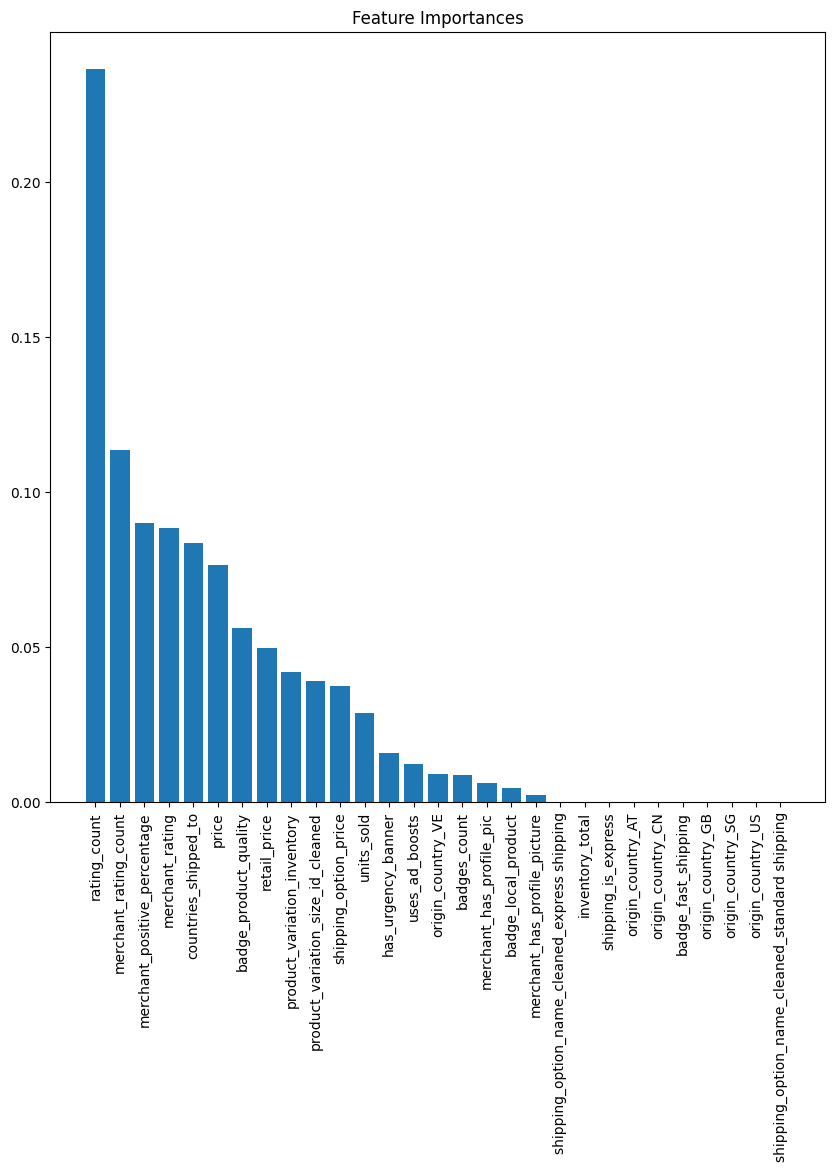

In [ ]:
# select important features in model in desc order and plot it

importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation='vertical')
plt.show()


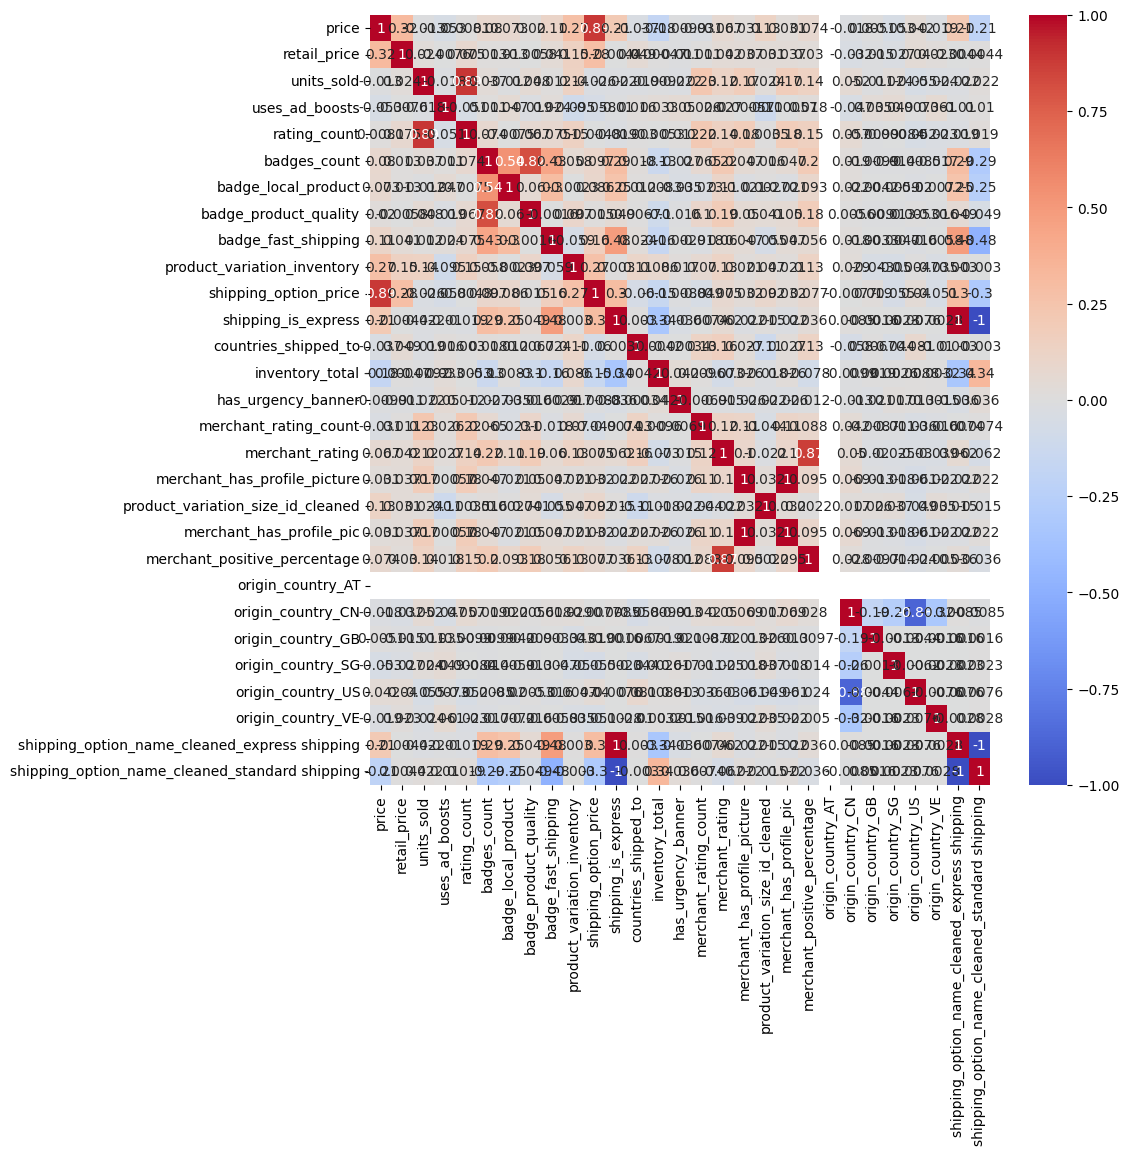

Correlated columns:
merchant_has_profile_pic
shipping_option_name_cleaned_express shipping


In [ ]:
# identify correlations in X and plot it

# Calculate the correlation matrix
corr_matrix = X.corr()

# Select the upper triangle of the correlation matrix
upper_tri = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))

# Find the index of the columns with the highest correlation values
correlated_cols = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

# Plot the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Print the correlated columns
print("Correlated columns:")
for col in correlated_cols:
    print(col)


In [ ]:
selected_X = X[['rating_count', 'merchant_rating_count','merchant_positive_percentage','price',
   'countries_shipped_to','merchant_rating','retail_price','badge_product_quality']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.6793885080643416

There is better performance.

trial 2: select another set

In [ ]:
other_selected_X = X[['rating_count', 'merchant_rating_count','merchant_positive_percentage','price',
   'countries_shipped_to','merchant_rating','retail_price','badge_product_quality','product_variation_size_id_cleaned',
   'shipping_option_price','units_sold','has_urgency_banner','uses_ad_boosts']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(other_selected_X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.6753537574194574

Almost the same!

trial 3: use Random Fores to train multiple decision trees on random subsets of the data and average their predictions as a way to reduce overfitting

In [ ]:
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.6753537574194574

ummm not much change!

array([[<Axes: title={'center': 'rating_count'}>,
        <Axes: title={'center': 'merchant_rating_count'}>,
        <Axes: title={'center': 'merchant_positive_percentage'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'countries_shipped_to'}>,
        <Axes: title={'center': 'merchant_rating'}>],
       [<Axes: title={'center': 'retail_price'}>,
        <Axes: title={'center': 'badge_product_quality'}>, <Axes: >]],
      dtype=object)

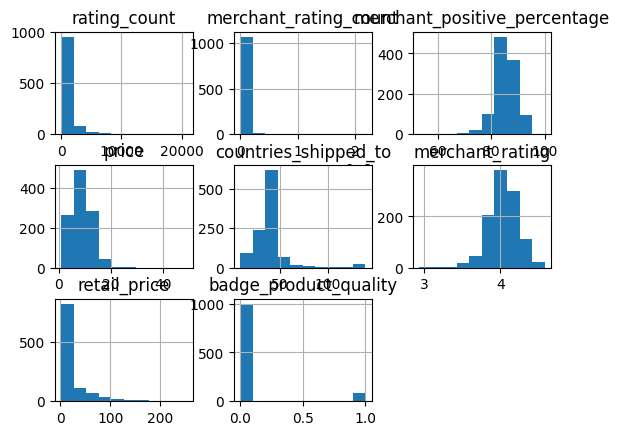

In [ ]:
X[['rating_count', 'merchant_rating_count','merchant_positive_percentage','price',
   'countries_shipped_to','merchant_rating','retail_price','badge_product_quality']].hist()

trial 4

it sounds we have non-standard numeric values, maybe this is causing a problem 🤔

lets use standard_scaler and use decision trees again

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, test_size=0.2, random_state=42)

# Z-score Standardization
standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

model.fit(X_train_standardized, y_train)
y_pred = model.predict(X_test_standardized)
f1_score(y_test, y_pred, average='weighted')

0.6925268849869373

oh slightly good change 🤩

trial 5: what about hayper-parameter tuning in decision tree
as it might be overfitting because of the depth, will use grid search to decide

In [ ]:
# Define the parameter grid
param_grid = {'max_depth': [3, 5, 7], 'min_samples_leaf': [2, 5, 10]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train_standardized, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Train the decision tree with the best parameters
best_decision_tree = DecisionTreeClassifier(**best_params)
best_decision_tree.fit(X_train_standardized, y_train)
y_pred = best_decision_tree.predict(X_test_standardized)
f1_score(y_test, y_pred, average='weighted')

0.7083543901933343

oh that is better 🥳🥳

In [ ]:
df

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,product_variation_size_id_cleaned,shipping_option_name_cleaned,product_color_cleaned,merchant_has_profile_pic,merchant_positive_percentage
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,Livraison standard,3,0,30,50,0.0,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,m,standard shipping,yellow,1,88.000000
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,Livraison standard,3,0,37,50,0.0,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,0,NaN,summer,2020-08,l,standard shipping,black,0,91.000000
2,6.00,34,EUR,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,Livraison standard,2,0,41,50,0.0,NaN,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,0,NaN,summer,2020-08,l,standard shipping,white,0,83.000000
3,4.67,4,EUR,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,Livraison standard,1,0,25,50,0.0,NaN,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,0,NaN,summer,2020-08,xs,standard shipping,lakeblue,0,87.000000
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,Livraison standard,3,0,15,50,1.0,Quantité limitée !,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,0,NaN,summer,2020-08,s,standard shipping,apricot,0,91.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,EUR,10000,0,4.0,2150,0,0,0,0,"corset top,Fashion,crop top,camisole,knittop,T...",red,S,50,Livraison standard,1,0,41,50,0.0,NaN,CN,fantastic_tune,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,0,NaN,summer,2020-08,s,standard shipping,red,0,92.000000
1090,5.00,5,EUR,1000,0,5.0,377,1,0,1,0,"Blues,Summer,luggagesticker,Bicycle,cute,fresh...",NaN,H01,31,Livraison standard,2,0,35,50,0.0,NaN,CN,zzbllss,zzbllss,"(2,904 notes)",2904,4.422521,0,NaN,summer,2020-08,h01,standard shipping,black,0,85.424518
1091,9.00,48,EUR,1000,1,4.0,135,0,0,0,0,"Summer,Vest,Fashion,Tank,camisole,Halter,Beaut...",purple,M,50,Livraison standard,3,0,25,50,0.0,NaN,CN,OIUG 56465,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,0,NaN,summer,2020-08,m,standard shipping,purple,0,78.000000
1092,11.00,10,EUR,10000,1,4.0,1479,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,letter pri...",black,M,50,Livraison standard,2,0,45,50,1.0,Quantité limitée !,CN,yubenqiang,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,0,NaN,summer,2020-08,m,standard shipping,black,0,83.000000


## SVM

In [ ]:
# Initialize SVM classifier
svm_ploy = SVC(kernel='poly', C=1.0, random_state=42)

# Train the SVM classifier
svm_ploy.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_ploy.predict(X_test)

f1_score(y_test, y_pred, average='weighted')

0.5549833762467815

In [ ]:
# Initialize SVM classifier
svm_rbf = SVC(kernel='rbf', C=1.0, random_state=42)

# Train the SVM classifier
svm_rbf.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_rbf.predict(X_test)

f1_score(y_test, y_pred, average='weighted')

0.5549833762467815

## Naive Bayes

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.5707044816363929

# Kaggle Leaderboard for Validation

In [ ]:
val_df = test_df.copy()

In [ ]:
val_df.isna().sum()

price                                               0
retail_price                                        0
units_sold                                          0
uses_ad_boosts                                      0
rating_count                                        0
badges_count                                        0
badge_local_product                                 0
badge_product_quality                               0
badge_fast_shipping                                 0
product_variation_inventory                         0
shipping_option_price                               0
shipping_is_express                                 0
countries_shipped_to                                0
inventory_total                                     0
has_urgency_banner                                355
merchant_rating_count                               0
merchant_rating                                     0
merchant_has_profile_picture                        0
product_variation_size_id_cl

In [ ]:
# for has_urgency_banner
val_df['has_urgency_banner'].fillna(0, inplace=True)

In [ ]:
# for merchant_positive_percentage
val_df['merchant_positive_percentage'] = val_df['merchant_positive_percentage'].fillna(merchant_positive_percentage_mean_value)

In [ ]:
val_df = val_df[selected_X.columns]

In [ ]:
val_df_stds = standard_scaler.transform(val_df)

In [ ]:
y_pred_for_kaggle = best_decision_tree.predict(val_df_stds)

In [ ]:
kaggle_df = pd.concat([pd.read_csv('/content/test_new.csv')[['id']], pd.DataFrame(data=y_pred_for_kaggle)], axis=1)

In [ ]:
kaggle_df.rename(columns={'id':'ID',0:'rating'}, inplace=True)

In [ ]:
kaggle_df.to_csv('submission_new.csv',index=False)